In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

In [63]:
import glob
import pandas as pd

a=glob.glob("data master/*.csv")
b=['14/15','16/17','17/18','19/20','12/13','15/16','13/14','18/19']
man = ['Brendon Rodgers', 'Jurgen Klopp', 'Jurgen Klopp', 'Jurgen Klopp','Brendon Rodgers','Jurgen Klopp','Brendon Rodgers','Jurgen Klopp']
points = [62,76,75,96,61,60,84,97]
pos = ['6th', '4th', '4th', '1st', '7th', '8th', '2nd', '2nd']
df = pd.DataFrame()

# Adding Manager and Season colummns and apppending data of all seasons
for i,j,k,x,y in zip(a,b,man,points,pos):
    data = pd.read_csv(i)
    data = data.loc[(data['HomeTeam'] == 'Liverpool') | (data['AwayTeam'] == 'Liverpool')]
    data.insert(0,'Season', j)
    data.insert(0,'Manager', k)
    data.insert(0,'Points', x)
    data.insert(0,'Position', y)
    df = df.append(data, sort = True)

df = df[['Season','Manager','Points','Position','HomeTeam','AwayTeam','FTR','FTAG','FTHG','HS','HST','HC','HF','HY','AS','AST','AC','AF','AY','HR','AR']]
df.to_csv('Liverpool.csv')  

# Separating Home and Away games
home = df.loc[(df['HomeTeam'] == 'Liverpool')]
home.to_csv('Liv_home.csv')
away = df.loc[(df['AwayTeam'] == 'Liverpool')]
away.to_csv('Liv_away.csv')



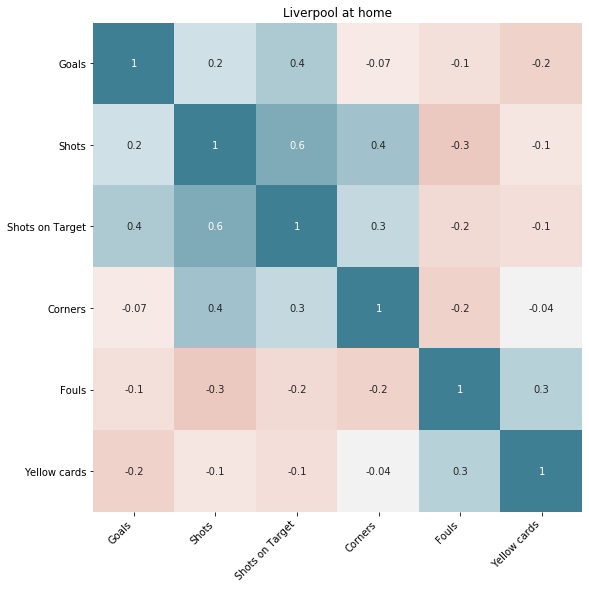

In [64]:
data = pd.read_csv('Liv_home.csv')
data = data[['FTHG','HS','HST','HC','HF','HY']]
datax = data.rename(columns={"FTHG": "Goals",'HS':'Shots', 'HST':'Shots on Target', 'HC':'Corners', 'HF':'Fouls', 'HY':'Yellow cards', 'HR':'Red Cards'})
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Liverpool at home')
cor = datax.corr()
ax = sns.heatmap(
    cor, fmt='0.1g',cbar=False,
    vmin=-1, vmax=1,center=0,annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);

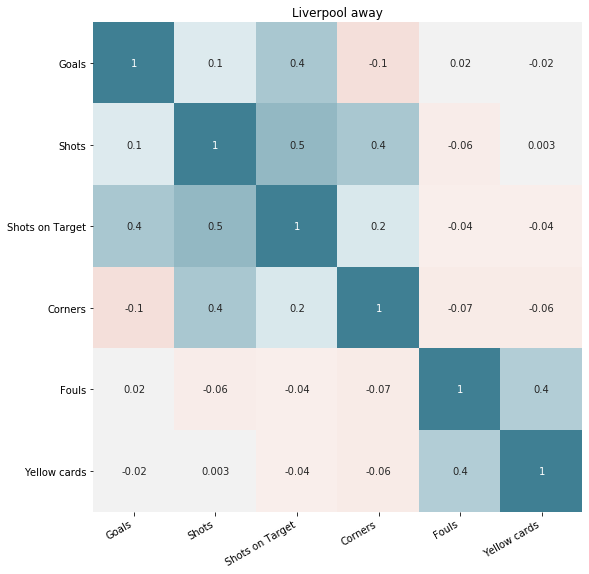

In [65]:
datay = pd.read_csv('Liv_away.csv')
datay = datay[['FTAG','AS','AST','AC','AF','AY']]
datay = datay.rename(columns={"FTAG": "Goals",'AS':'Shots', 'AST':'Shots on Target', 'AC':'Corners', 'AF':'Fouls', 'AY':'Yellow cards', 'AR':'Red Cards'})
fig, axis = plt.subplots(figsize=(11, 9))
axis.set_title('Liverpool away')
corr = datay.corr()
axis = sns.heatmap(
    corr, cbar=False, fmt='0.1g',
    vmin=-1, vmax=1, center=0, annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
bottom, top = axis.get_ylim()
axis.set_ylim(bottom + 0.5, top - 0.5)
axis.set_xticklabels(
    axis.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
)
axis.set_yticklabels(
    axis.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);

In [128]:
from sklearn.metrics import mean_squared_error
X_train, X_test = X[:130], X[130:]
y_train, y_test = y[:130], y[130:]
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=0, loss='ls').fit(X_train, y_train)
mean_squared_error(y_test, est.predict(X_test))

2.002556744751847

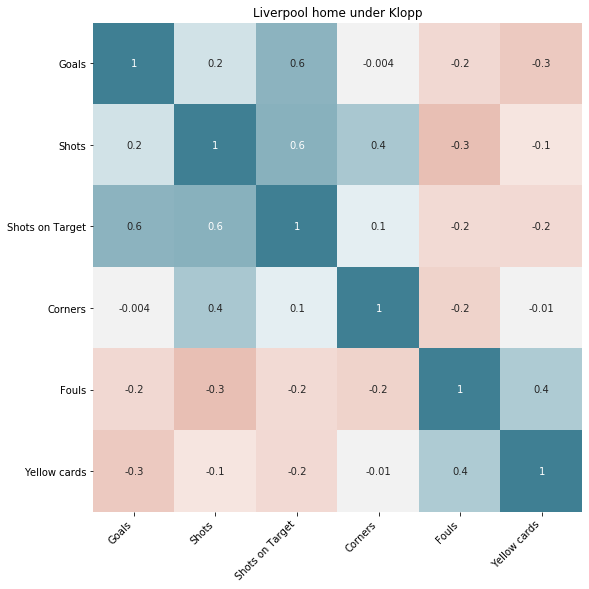

In [66]:

ooh = home.loc[home['Manager']== 'Jurgen Klopp']

ooh = ooh[['FTHG','HS','HST','HC','HF','HY']]
ooh = ooh.rename(columns={"FTHG": "Goals",'HS':'Shots', 'HST':'Shots on Target', 'HC':'Corners', 'HF':'Fouls', 'HY':'Yellow cards', 'HR':'Red Cards'})
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Liverpool home under Klopp')
cor = ooh.corr()
ax = sns.heatmap(
    cor, fmt='0.1g',cbar=False,
    vmin=-1, vmax=1,center=0,annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);

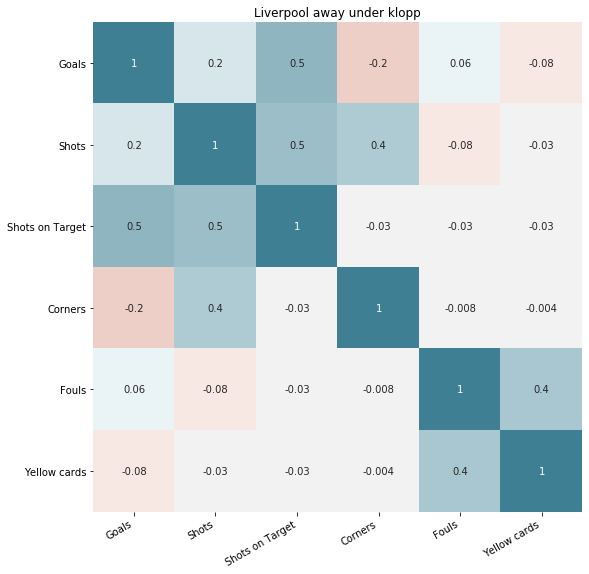

In [67]:
ooa = away.loc[away['Manager']== 'Jurgen Klopp']
ooa = ooa[['FTAG','AS','AST','AC','AF','AY']]
ooa = ooa.rename(columns={"FTAG": "Goals",'AS':'Shots', 'AST':'Shots on Target', 'AC':'Corners', 'AF':'Fouls', 'AY':'Yellow cards', 'AR':'Red Cards'})
fig, axis = plt.subplots(figsize=(11, 9))
axis.set_title('Liverpool away under klopp')
corr = ooa.corr()
axis = sns.heatmap(
    corr, cbar=False, fmt='0.1g',
    vmin=-1, vmax=1, center=0, annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
bottom, top = axis.get_ylim()
axis.set_ylim(bottom + 0.5, top - 0.5)
axis.set_xticklabels(
    axis.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
)
axis.set_yticklabels(
    axis.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);

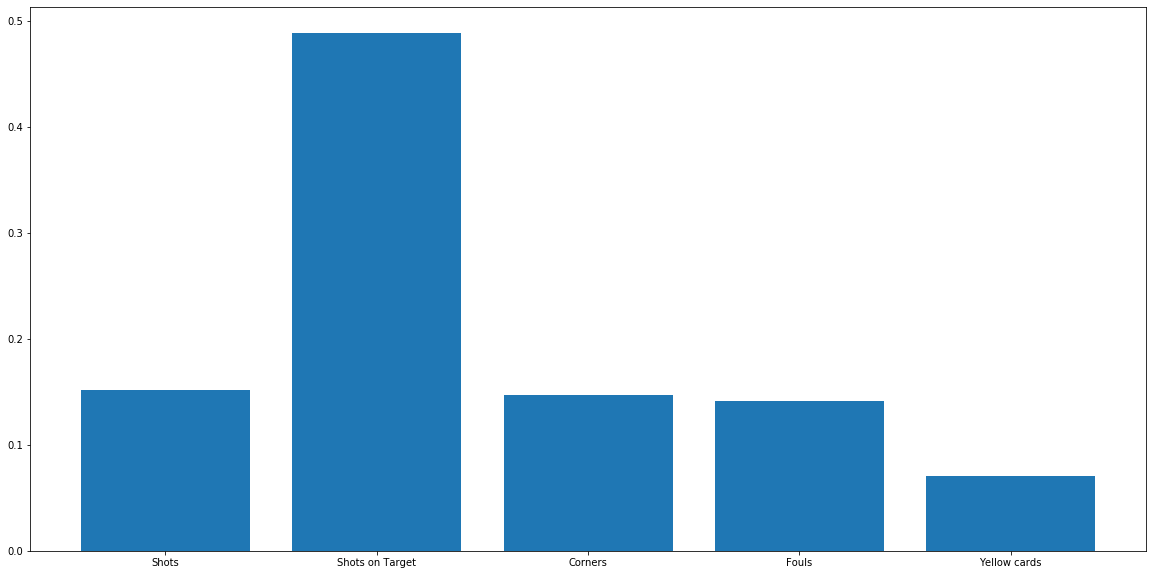

In [69]:
from sklearn.ensemble import GradientBoostingRegressor 


y = res["Goals"]
X = res.drop(["Goals"], axis=1)

regr = GradientBoostingRegressor(max_depth=4, random_state=0, n_estimators=100)
regr.fit(X, y)
regr.feature_importances_

plt.figure(figsize=(20,10))
plt.bar(np.arange(len(regr.feature_importances_)), regr.feature_importances_)
plt.xticks(np.arange(len(regr.feature_importances_)), X.columns)
plt.show()

In [68]:
res = pd.concat([ooh,ooa])
res

,Goals,Shots,Shots on Target,Corners,Fouls,Yellow cards
33,4.0,17.0,11.0,1.0,4.0,1.0
52,5.0,32.0,12.0,13.0,8.0,1.0
79,0.0,9.0,3.0,3.0,14.0,0.0
85,2.0,21.0,7.0,3.0,9.0,1.0
108,6.0,28.0,17.0,6.0,14.0,1.0
124,2.0,27.0,7.0,9.0,5.0,1.0
147,2.0,18.0,3.0,11.0,7.0,2.0
178,4.0,20.0,6.0,8.0,9.0,0.0
184,1.0,5.0,1.0,4.0,12.0,2.0
212,2.0,16.0,5.0,6.0,7.0,1.0


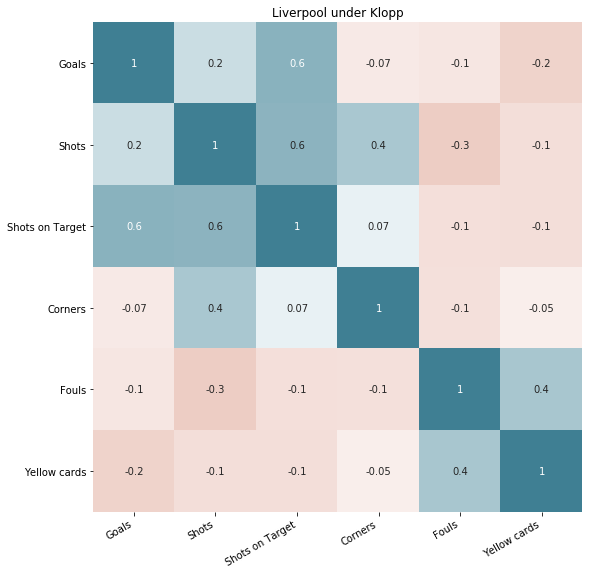

In [70]:

fig, axis = plt.subplots(figsize=(11, 9))
corrr = res.corr()
axis = sns.heatmap(
    corrr, cbar=False, fmt='0.1g',
    vmin=-1, vmax=1, center=0, annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
axis.set_title('Liverpool under Klopp')
bottom, top = axis.get_ylim()
axis.set_ylim(bottom + 0.5, top - 0.5)
axis.set_xticklabels(
    axis.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
)
axis.set_yticklabels(
    axis.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);

In [71]:
q = pd.read_csv("data master/16-17.csv")
w= pd.read_csv("data master/17-18.csv")
e= pd.read_csv("data master/18-19.csv")
r= pd.read_csv("data master/19-20.csv")
manc = pd.concat([q,w,e,r])
manc = manc.loc[(manc['HomeTeam'] == 'Man City') | (manc['AwayTeam'] == 'Man City')]

manca = manc.loc[(manc['AwayTeam'] == 'Man City')]
manca = manca[['FTAG','AS','AST','AC','AF','AY']]
manca = manca.rename(columns={"FTAG": "Goals",'AS':'Shots', 'AST':'Shots on Target', 'AC':'Corners', 'AF':'Fouls', 'AY':'Yellow cards', 'AR':'Red Cards'})

manch = manc.loc[(manc['HomeTeam'] == 'Man City')]
manch = manch[['FTHG','HS','HST','HC','HF','HY']]
manch = manch.rename(columns={"FTHG": "Goals",'HS':'Shots', 'HST':'Shots on Target', 'HC':'Corners', 'HF':'Fouls', 'HY':'Yellow cards', 'HR':'Red Cards'})


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


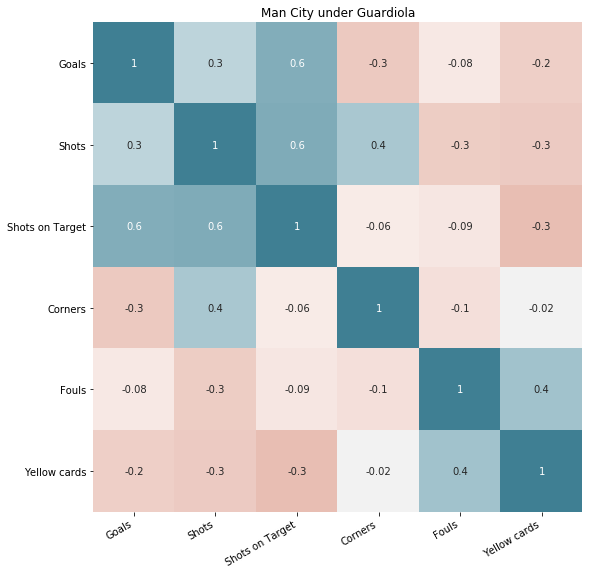

In [72]:
mc = pd.concat([manch,manca])


fig, axis = plt.subplots(figsize=(11, 9))
corr = mc.corr()
axis = sns.heatmap(
    corr, cbar=False, fmt='0.1g',
    vmin=-1, vmax=1, center=0, annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
axis.set_title('Man City under Guardiola')
bottom, top = axis.get_ylim()
axis.set_ylim(bottom + 0.5, top - 0.5)
axis.set_xticklabels(
    axis.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
)
axis.set_yticklabels(
    axis.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);